In [20]:
from difflib import SequenceMatcher
import pandas as pd
from collections import defaultdict

In [21]:
def similar(a, b):
    """ Calculate the similarity of two strings and return True if similarity is 90% or more. """
    return SequenceMatcher(None, a, b).ratio() >= 0.8

In [22]:


# Function to get unique pairs from a list of characters
def get_unique_pairs(characters):
    pairs = set()
    for i in range(len(characters)):
        for j in range(i + 1, len(characters)):
            pairs.add(tuple(sorted([characters[i], characters[j]])))
    return pairs

# Load the all_characters.txt file
with open('all_characters.txt', 'r') as file:
    all_characters = file.read().splitlines()

# Convert all characters to lowercase for consistent comparison
all_characters = [character.lower() for character in all_characters]

# Load the CSV file into a DataFrame
file_path = 'Game_of_Thrones_Script.csv'
got_df = pd.read_csv(file_path, delimiter=';')

# Extract unique character names from the DataFrame and convert to lowercase
got_characters = set(got_df['Name'].dropna().unique())
got_characters = {character.lower() for character in got_characters}

# Display the first few characters from both lists for review
all_characters[:5], list(got_characters)[:5]


(['aemon',
  'aggar',
  'aggo_(the_north_remembers)',
  'aggo_(the_red_woman)',
  'alanna'],
 ['lyanna stark', 'gatins', 'ramsay bolton', 'boy', 'tell me something'])

In [38]:

# Create a dictionary mapping characters from the CSV to those in the TXT file
mapping_dict = {}

for got_character in got_characters:
    for all_character in all_characters:
        if similar(got_character, all_character):
            mapping_dict[got_character] = all_character
            break  # Stop searching once a match is found

# Display a sample of the mapping dictionary
list(mapping_dict.items())[:10]


[('lyanna stark', 'lyanna_stark'),
 ('gatins', 'gatins'),
 ('ramsay bolton', 'ramsay_bolton'),
 ('hizdahr zo loraq', 'hizdahr_zo_loraq'),
 ('jory cassel', 'jory_cassel'),
 ('irri', 'irri'),
 ('ollys mother', 'olly%27s_mother'),
 ('tansy', 'tansy'),
 ('rickon stark', 'rickon_stark'),
 ('morag', 'morag')]

In [39]:
# Filter the DataFrame to keep only rows with names that have a matching character
# and create an independent copy

got_df_filtered = got_df[got_df['Name'].isin(mapping_dict.keys())].copy()

# Display a sample of the filtered and updated DataFrame
got_df_filtered.sample(10)


,Release Date,Season,Episode,Episode Title,Name,Sentence
21365,2017-08-06,Season 7,Episode 4,The Spoils Of War,daenerys targaryen,commands DROGON to fire at the crossbow.
2131,2011-05-29,Season 1,Episode 7,You Win or You Die,cersei lannister,Do you love your children?
23414,2019-05-12,Season 8,Episode 5,The Bells,daenerys targaryen,sentence you to die. Dracarys.
5963,2012-05-13,Season 2,Episode 7,A Man Without Honor,theon greyjoy,If there are any who still question whether yo...
13352,2014-06-01,Season 4,Episode 8,The Mountain and the Viper,theon greyjoy,Lord Bolton took me captive after Winterfell. ...
16939,2015-06-14,Season 5,Episode 10,Mother’s Mercy,jon snow,You know that The Citadel will make you swear ...
23900,2019-05-19,Season 8,Episode 6,The Iron Throne,sam,The Archmaester has done some research on this...
9787,2013-05-19,Season 3,Episode 8,Second Sons,tyrion lannister,"Well, today you have to."
14099,2014-06-15,Season 4,Episode 10,The Children,arya stark,"I want to go north, to the wall."
13226,2014-05-18,Season 4,Episode 7,Mockingbird,robin arryn,I didn't ruin it.


In [40]:

# Remove rows where 'Name' is NaN
got_df_cleaned = got_df_filtered.dropna(subset=['Name'])

# Preparing a dictionary to hold interactions per season
interactions_per_season = defaultdict(lambda: defaultdict(int))

for i in range(len(got_df_cleaned)):
    current_season = got_df_cleaned.iloc[i]['Season']
    current_speaker = got_df_cleaned.iloc[i]['Name']

    # Next 5 lines or to the end of the dataset
    next_lines = got_df_cleaned.iloc[i+1:i+6]

    # Characters in the current conversation excluding the current speaker
    characters_in_conversation = list(next_lines['Name'].unique())
    if current_speaker in characters_in_conversation:
        characters_in_conversation.remove(current_speaker)

    # Get all unique pairs of characters in this conversation
    pairs = get_unique_pairs(characters_in_conversation)

    # Update the interaction count for each pair
    for pair in pairs:
        interactions_per_season[current_season][pair] += 1

# Convert to DataFrame for easier analysis and visualization
interactions_df = pd.DataFrame([
    {'Season': season, 'Pair': pair, 'Interactions': count}
    for season, pairs in interactions_per_season.items()
    for pair, count in pairs.items()
])

# Displaying a sample of the final DataFrame
interactions_df.sample(10)


,Season,Pair,Interactions
574,Season 1,"(all, greatjon umber)",4
682,Season 2,"(catelyn stark, robb stark)",16
584,Season 1,"(leo lefford, tyrion lannister)",7
919,Season 2,"(osha, qhorin)",2
1572,Season 4,"(bronn, tywin lannister)",4
881,Season 2,"(lancel lannister, stannis baratheon)",5
2608,Season 7,"(daenerys targaryen, theon greyjoy)",5
2218,Season 6,"(cersei lannister, margaery tyrell)",5
690,Season 2,"(mhaegan, tyrion lannister)",1
670,Season 2,"(robb stark, tyrion lannister)",6


In [41]:
#display all characters in the dataset
got_df_cleaned['Name'].unique()


array(['waymar royce', 'will', 'gared', 'jon snow', 'sansa stark',
       'eddard stark', 'robb stark', 'rodrik cassel', 'catelyn stark',
       'bran stark', 'theon greyjoy', 'jaime lannister',
       'cersei lannister', 'luwin', 'arya stark', 'robert baratheon',
       'tyrion lannister', 'ros', 'daenerys targaryen', 'benjen stark',
       'jorah mormont', 'drogo', 'sandor clegane', 'doreah', 'irri',
       'myrcella baratheon', 'jhiqui', 'mycah', 'jory cassel', 'varys',
       'renly baratheon', 'petyr baelish', 'old nan', 'guard',
       'alliser thorne', 'jeor mormont', 'grenn', 'rast',
       'barristan selmy', 'lancel lannister', 'rakharo', 'yoren',
       'syrio forel', 'sam', 'janos slynt', 'tobho mott',
       'gendry baratheon', 'marillion', 'masha heddle', 'bronn',
       'loras tyrell', 'illyrio mopatis', 'vardis egen', 'lysa arryn',
       'robin arryn', 'mord', 'mhaegen', 'osha', 'beric dondarrion',
       'mordane', 'tywin lannister', 'daenerys targarian',
       'jarem

In [ ]:
#Function to match transcript character names with wiki character names in all_characters.txt
 

In [11]:
# Filtering the dataframe for Season 1 and sorting by the number of interactions
season_1_interactions = interactions_df[interactions_df['Season'] == 'Season 1']
top_15_interactions_season_1 = season_1_interactions.sort_values(by='Interactions', ascending=False).head(15)

top_15_interactions_season_1


,Season,Pair,Interactions
107,Season 1,"(daenerys targaryen, jorah mormont)",49
66,Season 1,"(eddard stark, robert baratheon)",45
22,Season 1,"(catelyn stark, robb stark)",40
48,Season 1,"(cersei lannister, eddard stark)",39
297,Season 1,"(bronn, tyrion lannister)",37
25,Season 1,"(catelyn stark, eddard stark)",36
21,Season 1,"(eddard stark, sansa stark)",35
63,Season 1,"(arya stark, eddard stark)",35
33,Season 1,"(robb stark, theon greyjoy)",30
68,Season 1,"(arya stark, sansa stark)",30


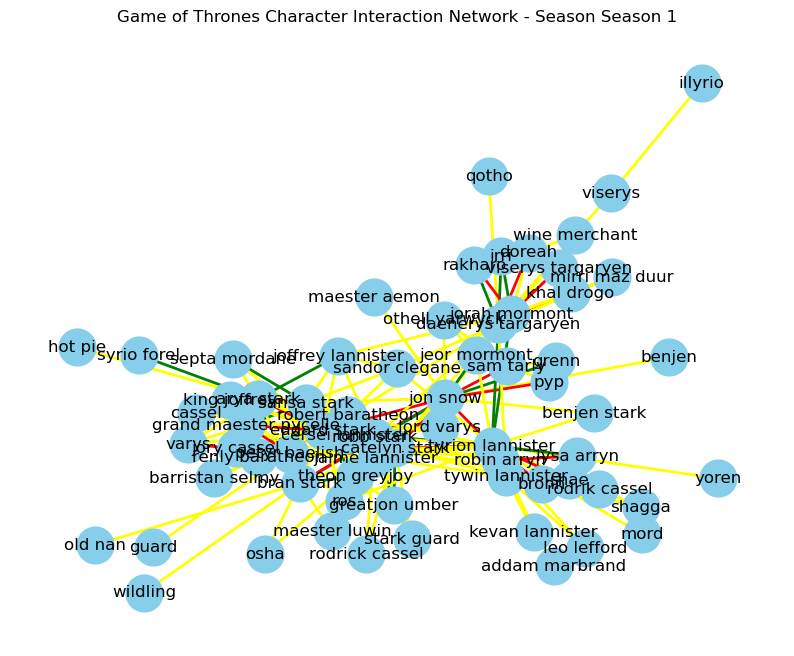

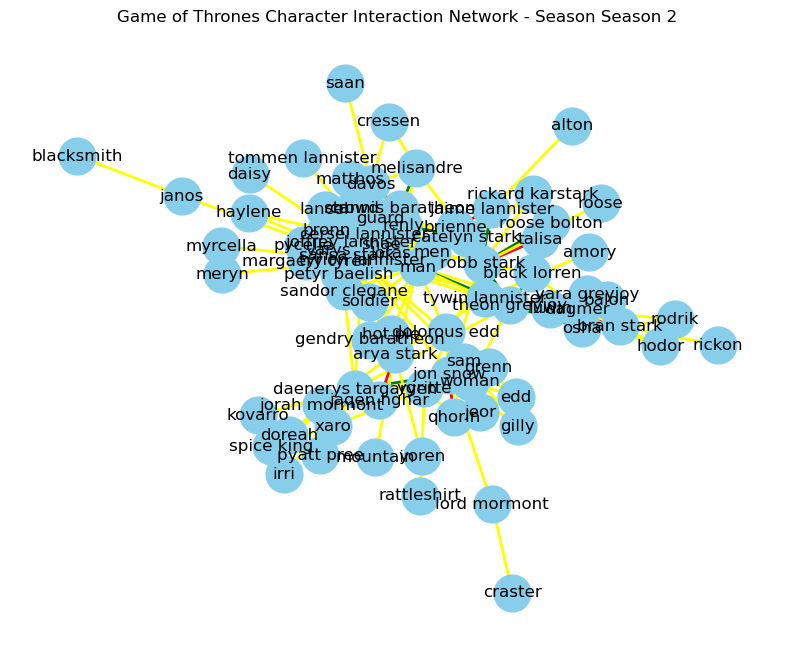

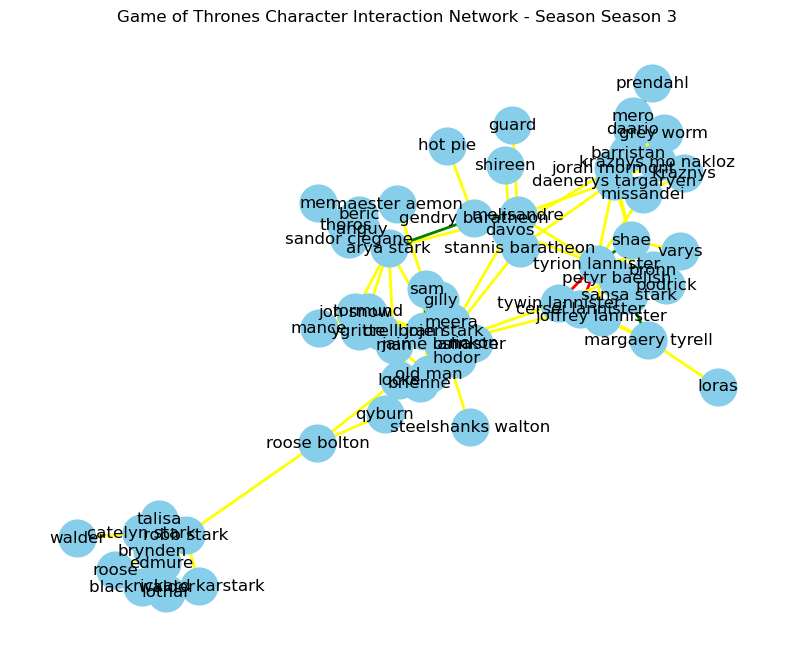

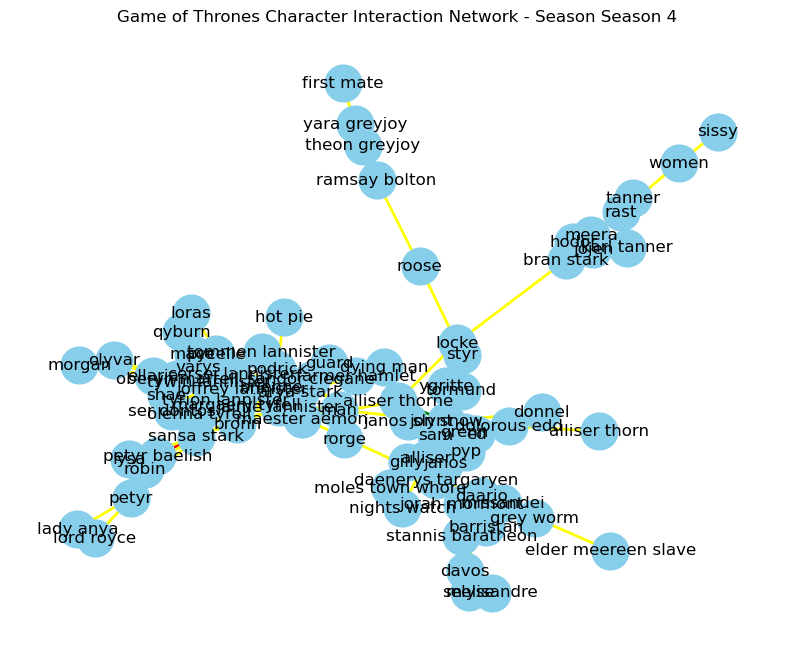

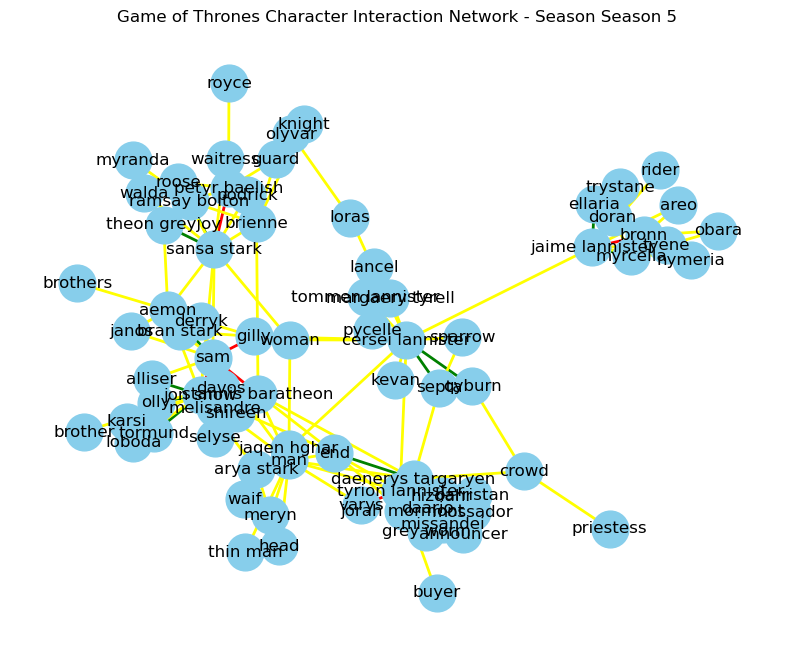

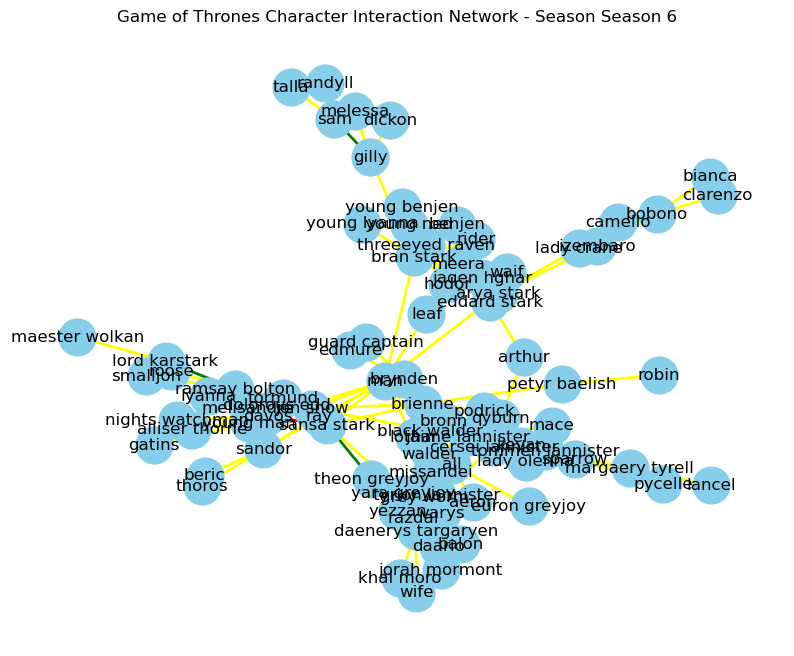

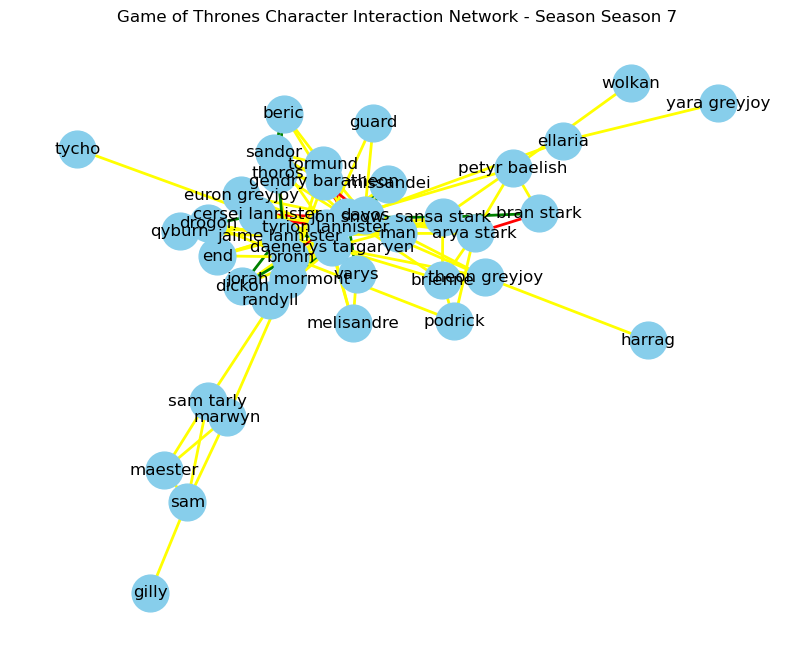

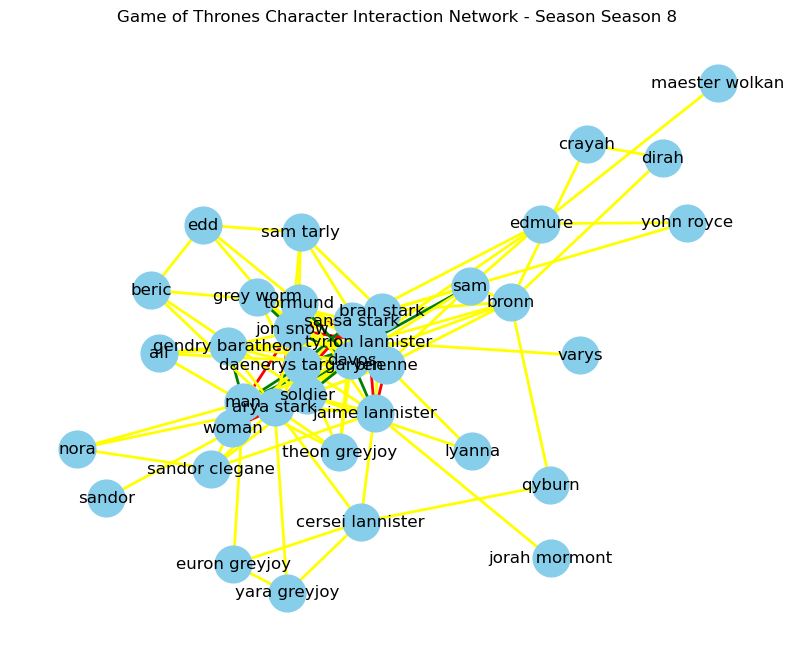

In [57]:
import matplotlib.pyplot as plt
import networkx as nx

# Create networks for each season
def create_network(season):
    # Filter data for the specific season
    season_data = interactions_df[interactions_df['Season'] == season]

    # Create a graph
    G = nx.Graph()
    
    # Add edges with interaction counts as weights, only if weight is 3 or more
    for index, row in season_data.iterrows():
        pair = row['Pair']
        interactions = row['Interactions']
        if interactions >= 5:
            G.add_edge(pair[0], pair[1], weight=interactions)

    # Remove isolated nodes
    isolated_nodes = list(nx.isolates(G))
    G.remove_nodes_from(isolated_nodes)

    # Get the largest weakly connected component
    if len(G) > 0:  # Checking if the graph is not empty
        largest_component = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_component).copy()

    return G

# Plotting function
def plot_network(G, season):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes

    # Draw the nodes and the edges
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

    # Edges
    edge_colors = [
        'yellow' if G[u][v]['weight'] < 12 else
        'green' if 3 <= G[u][v]['weight'] <= 15 else
        'red' for u, v in G.edges()
    ]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

    # Labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    plt.title(f"Game of Thrones Character Interaction Network - Season {season}")
    plt.axis('off')
    plt.show()

# Plotting networks for each season
for season in sorted(interactions_df['Season'].unique()):
    G = create_network(season)
    plot_network(G, season)

In [58]:
import dash
from dash import dcc, html, Input, Output, State
import plotly.graph_objs as go
import networkx as nx
import pandas as pd

# Load and prepare your data here...
# Example: interactions_df = pd.read_csv('path_to_your_data.csv')

def create_plotly_graph(G, season):
    pos = nx.circular_layout(G)  # Using circular layout
    
    edge_trace = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        weight = G[edge[0]][edge[1]]['weight']
        edge_color = 'yellow' if weight < 12 else 'green' if 12 <= weight <= 15 else 'red'
        
        edge_trace.append(go.Scatter(
            x=[x0, x1, None], y=[y0, y1, None],
            line=dict(width=2, color=edge_color),
            hoverinfo='none',
            mode='lines'))

    node_trace = go.Scatter(
        x=[pos[node][0] for node in G.nodes()],
        y=[pos[node][1] for node in G.nodes()],
        text=[node for node in G.nodes()],
        mode='markers',
        customdata=[node for node in G.nodes()],
        hoverinfo='text',
        marker=dict(showscale=False, color='blue', size=10))

    return {
        'data': edge_trace + [node_trace],
        'layout': go.Layout(
            title=f'Game of Thrones Character Interaction Network - Season {season}',
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            height=600
        )
    }

# Function to filter the graph based on the selected node
def filter_graph(G, node):
    neighbors = list(G.neighbors(node))
    return G.subgraph([node] + neighbors)

# Creating a Dash application
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='season-dropdown',
        options=[{'label': f'Season {i}', 'value': i} for i in sorted(interactions_df['Season'].unique())],
        value=1
    ),
    html.Button('Reset', id='reset-button', n_clicks=0),
    dcc.Graph(id='network-graph', clickData=None, selectedData=None),
    html.Div(id='click-state', style={'display': 'none'})
])

# Callback to update graph based on season selection, node click, and reset button
@app.callback(
    Output('network-graph', 'figure'),
    Output('click-state', 'children'),
    [Input('season-dropdown', 'value'),
     Input('network-graph', 'clickData'),
     Input('reset-button', 'n_clicks')],
    [State('click-state', 'children')]
)
def update_graph(selected_season, clickData, reset_clicks, click_state):
    G = create_network(selected_season)
    ctx = dash.callback_context

    # Identify which input triggered the callback
    trigger_id = ctx.triggered[0]['prop_id'].split('.')[0]

    if trigger_id == 'reset-button':
        new_click_state = None
    else:
        if clickData and 'customdata' in clickData['points'][0]:
            clicked_node = clickData['points'][0]['customdata']
            if clicked_node == click_state:
                new_click_state = None
            else:
                new_click_state = clicked_node
                G = filter_graph(G, new_click_state)
        else:
            new_click_state = click_state

    return create_plotly_graph(G, selected_season), new_click_state

# Running the app
if __name__ == '__main__':
    app.run_server(debug=True)
